In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1)
INPUT_SIZE = 1
LR = 0.02

In [2]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(
            input_size=1,
            hidden_size=32,
            num_layers=1,
            batch_first=True
        )
        self.fc = nn.Linear(32, 1)
    
    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.fc(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

In [3]:
net = RNN()
print(net)
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=LR)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


20
20
10
30
30
30
30
10
20
30
20
20
30
10
10
20
20
20
10
30
10
10
20
20
10
30
20
30
20
20
30
20
20
10
30
30
20
10
10
30
30
10
30
20
10
30
30
30
20
10
10
20
30
20
30
10
10
30
10
30
20
10
10
20
10
10
10
30
10
20
30
30
30
10
10
30
20
30
10
20
20
20
20
20
30
10
10
20
20
10
10
20
20
10
30
10
10
10
10
20
30
30
20
10
10
10
20
10
30
10
30
10
20
20
30
10
30
30
20
10


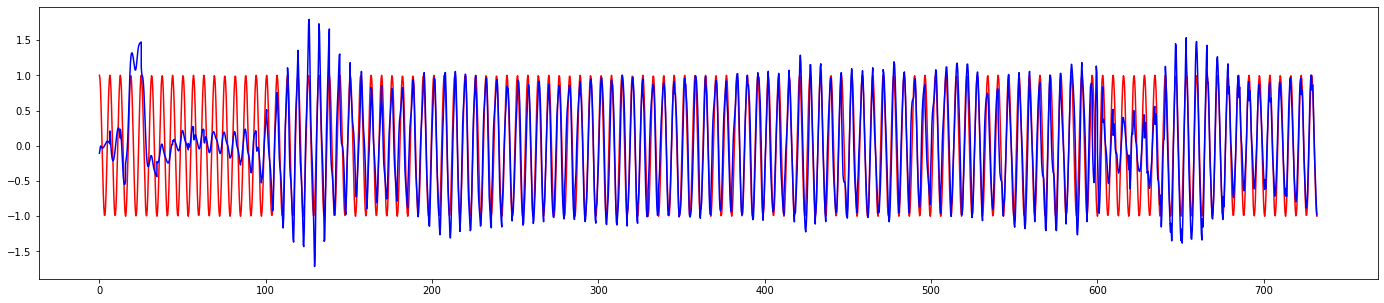

In [4]:
x_all = torch.tensor([])
y1_all = torch.tensor([])
y2_all = torch.tensor([])

h_state = None

step = 0
for t in range(120):
    dynamic_steps = np.random.randint(1, 4)
    start, end = step * np.pi, (step + dynamic_steps) * np.pi
    step += dynamic_steps
    
    steps = torch.linspace(start, end, 10 * dynamic_steps)
    
    print(len(steps))
    
    inputs = torch.sin(steps).view(1, -1, 1)
    targets = torch.cos(steps).view(1, -1, 1)
    net.zero_grad()
    outputs, h_state = net(inputs, h_state)
    h_state = h_state.data
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    x_all = torch.cat((x_all, steps), dim=0)
    y1_all = torch.cat((y1_all, targets.cpu().detach().flatten()), dim=0)
    y2_all = torch.cat((y2_all, outputs.cpu().detach().flatten()), dim=0)
    
%matplotlib inline
plt.figure(1, figsize=(24, 5))
plt.plot(x_all, y1_all, 'r-')
plt.plot(x_all, y2_all, 'b-')
plt.draw();